In [1]:
!pip install yfinance
!pip install ortools
!pip install ipython

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 8.8 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 KB 4.4 MB/s eta 0:00:000:00:01
Defaulting to user installation because normal site-packages is not writeable


In [10]:
import yfinance as yf
import datetime

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# from tables import Column
import time

In [11]:
def FormataStringData(data):

  dia  = data.split("/")[0]
  mes  = data.split("/")[1]
  ano  = data.split("/")[2]

  return ano + '-' + mes + '-' + dia

In [12]:
stock1 = 'ITUB3.SA'
stock2 = 'VALE3.SA'

stock1_data = yf.download(stock1, start=FormataStringData('01/12/2017'), end=FormataStringData('01/01/2023'))
stock1_data = stock1_data.fillna(0)

stock2_data = yf.download(stock2, start=FormataStringData('01/12/2017'), end=FormataStringData('01/01/2023'))
stock2_data = stock2_data.fillna(0)

stock1_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,24.740000,24.933332,24.360001,24.613333,18.721016,150150
2017-12-04,24.673332,24.933332,24.433332,24.853333,18.903555,545700
2017-12-05,24.853333,25.333332,24.639999,24.740000,18.817356,95550
2017-12-06,24.533333,24.799999,24.286667,24.566666,18.685520,210300
2017-12-07,24.500000,24.833332,24.053333,24.660000,18.756517,83100
...,...,...,...,...,...,...
2022-12-23,21.570000,22.070000,21.520000,21.860001,21.221642,623700
2022-12-26,21.840000,21.840000,21.379999,21.580000,20.949821,149600
2022-12-27,21.650000,21.650000,21.200001,21.379999,20.755659,863300


In [21]:
stock1_data.index

DatetimeIndex(['2017-12-01', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-11', '2017-12-12',
               '2017-12-13', '2017-12-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

In [9]:
stock1_return = stock1_data['Adj Close'].pct_change()
returns_stock1 = stock1_return[1:]
returns_stock1_acm = (1+returns_stock1).cumprod()

stock2_return = stock2_data['Adj Close'].pct_change()
returns_stock2 = stock2_return[1:]
returns_stock2_acm = (1+returns_stock2).cumprod()

cov_matrix = pd.concat([returns_stock1_acm, returns_stock2_acm], axis=1).cov()

portfolio_return = (0.5 * returns_stock1) + (0.5 * returns_stock2)
portfolio_return_acm = (0.5 * returns_stock1_acm) + (0.5 * returns_stock2_acm)


print('Retorno de ' + stock1 + ': ', returns_stock1_acm[-1])
print('Retorno de ' + stock2 + ': ', returns_stock2_acm[-1])
print('Retorno do portfolio: ', portfolio_return_acm[-1])

Retorno de ITUB3.SA:  1.135128493482463
Retorno de VALE3.SA:  3.6322959817622653
Retorno do portfolio:  2.383712237622364


In [19]:
stock1_var = returns_stock1_acm.var()
stock2_var = returns_stock2_acm.var()
portfolio_std = np.sqrt(0.5**2*stock1_var+0.5**2*stock2_var+2*0.5*0.5*cov_matrix.values[0,1])

print('Desvio padrão de ' + stock1 + ': ', np.sqrt(stock1_var))
print('Desvio padrão de ' + stock2 + ': ', np.sqrt(stock2_var))
print('Desvio padrão do portfolio : ', portfolio_std)

Desvio padrão de ITUB3.SA:  0.14222083458262733
Desvio padrão de VALE3.SA:  0.8721653086249893
Desvio padrão do portfolio :  0.4270988528078331


In [20]:
dates = portfolio_return.index
formatted_dates = [date.strftime('%Y-%m-%d') for date in dates]

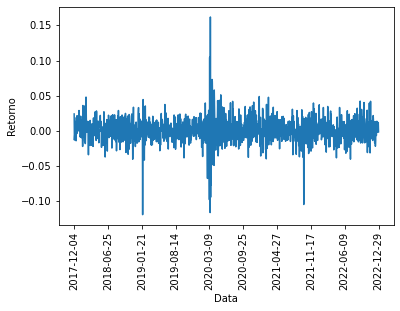

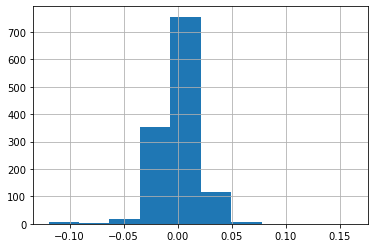

In [21]:
fig, ax = plt.subplots()
ax.plot(formatted_dates, portfolio_return)
ax.set_xlabel('Data')
ax.set_ylabel('Retorno')

number_of_ticks = 10
indices = np.linspace(0, len(formatted_dates)-1, number_of_ticks)
ax.xaxis.set_ticks(indices)

ax.set_xticklabels([formatted_dates[int(i)] for i in indices], rotation=90)

plt.show()


#plt.savefig('retorno_portfolio.png')

ax = portfolio_return.hist()
fig = ax.get_figure()
#fig.savefig('portfolio_hist.png')


In [22]:
dates = portfolio_return_acm.index
formatted_dates = [date.strftime('%Y-%m-%d') for date in dates]

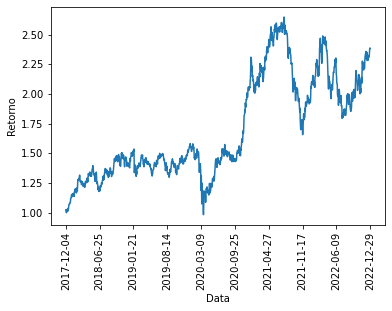

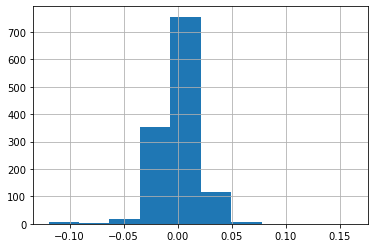

In [23]:
fig, ax = plt.subplots()
ax.plot(formatted_dates, portfolio_return_acm)
ax.set_xlabel('Data')
ax.set_ylabel('Retorno')

number_of_ticks = 10
indices = np.linspace(0, len(formatted_dates)-1, number_of_ticks)
ax.xaxis.set_ticks(indices)

ax.set_xticklabels([formatted_dates[int(i)] for i in indices], rotation=90)

plt.show()


#plt.savefig('retorno_portfolio.png')

ax = portfolio_return.hist()
fig = ax.get_figure()
#fig.savefig('portfolio_hist.png')

In [24]:
stock1_data['log-return'] =(np.log(stock1_data['Adj Close']) - np.log(stock1_data['Adj Close'].shift(1)))
stock2_data['log-return'] =(np.log(stock2_data['Adj Close']) - np.log(stock2_data['Adj Close'].shift(1)))

cov_matrix = pd.concat([stock1_data['log-return'], stock2_data['log-return'] ], axis=1).cov()

portfolio_return_acm = (0.5 * stock1_data['log-return'].cumsum()) + (0.5 * stock2_data['log-return'].cumsum())

print('Log-Retorno de ' + stock1 + ': ', stock1_data['log-return'].cumsum()[-1])
print('Log-Retorno de ' + stock2 + ': ', stock2_data['log-return'].cumsum()[-1])

print('Retorno do portfolio: ', portfolio_return_acm[-1])

Log-Retorno de ITUB3.SA:  0.12674682846784258
Log-Retorno de VALE3.SA:  1.2898650298548882
Retorno do portfolio:  0.7083059291613654


In [25]:
stock1_var = stock1_data['log-return'].var()
stock2_var = stock2_data['log-return'].var()
portfolio_std = np.sqrt(0.5**2*stock1_var+0.5**2*stock2_var+2*0.5*0.5*cov_matrix.values[0,1])

print('Desvio padrão de ' + stock1 + ': ', np.sqrt(stock1_var))
print('Desvio padrão de ' + stock2 + ': ', np.sqrt(stock2_var))
print('Desvio padrão do portfolio : ', portfolio_std)

Desvio padrão de ITUB3.SA:  0.019433052739438208
Desvio padrão de VALE3.SA:  0.0259056509214729
Desvio padrão do portfolio :  0.018467878643116113


In [26]:
dates = portfolio_return.index
formatted_dates = [date.strftime('%Y-%m-%d') for date in dates]

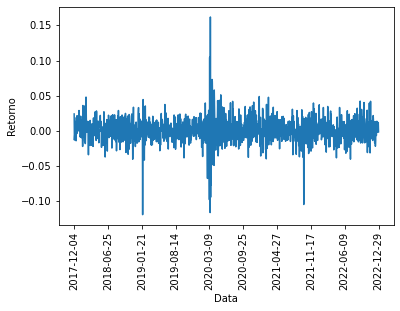

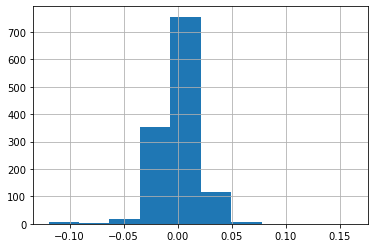

In [27]:
fig, ax = plt.subplots()
ax.plot(formatted_dates, portfolio_return)
ax.set_xlabel('Data')
ax.set_ylabel('Retorno')

number_of_ticks = 10
indices = np.linspace(0, len(formatted_dates)-1, number_of_ticks)
ax.xaxis.set_ticks(indices)

ax.set_xticklabels([formatted_dates[int(i)] for i in indices], rotation=90)

plt.show()


#plt.savefig('retorno_portfolio.png')

ax = portfolio_return.hist()
fig = ax.get_figure()
#fig.savefig('portfolio_hist.png')


In [28]:
dates = portfolio_return_acm.index
formatted_dates = [date.strftime('%Y-%m-%d') for date in dates]

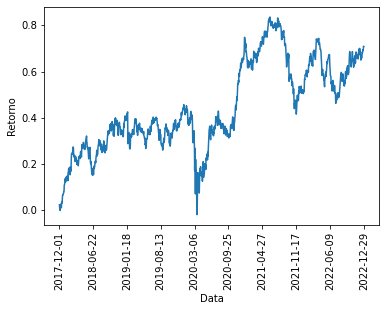

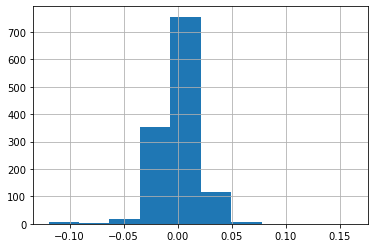

In [29]:
fig, ax = plt.subplots()
ax.plot(formatted_dates, portfolio_return_acm)
ax.set_xlabel('Data')
ax.set_ylabel('Retorno')

number_of_ticks = 10
indices = np.linspace(0, len(formatted_dates)-1, number_of_ticks)
ax.xaxis.set_ticks(indices)

ax.set_xticklabels([formatted_dates[int(i)] for i in indices], rotation=90)

plt.show()


#plt.savefig('retorno_portfolio.png')

ax = portfolio_return.hist()
fig = ax.get_figure()
#fig.savefig('portfolio_hist.png')

In [36]:
class GetData:

    begin_date = ''
    end_date = ''
    dataDir = 0
    df  = None

    def __init__(self, bdate, edate):
        self.begin_date = FormataStringData(bdate)
        self.end_date = FormataStringData(edate)

    def import_data(self, dataDir):
        self.dataDir = dataDir
        self.df = pd.read_csv(dataDir,sep = ';')

        start = time.time()

        df_stock = pd.DataFrame()
        stock_list = self.df['Ticker'].tolist()
        #stock_list.append('IVVB11.SA')
        stock_list.append('^GSPC')
        for stock in stock_list:
          df_stock[stock] = yf.download(stock, start= self.begin_date, end= self.end_date)['Adj Close']

        #df_stock=df_stock.fillna(method="bfill")

        #Stocks removed if data of the stock is not complete
        df_stock = df_stock.dropna(axis=1)

        end = time.time()
        print("Elapsed Time Seq: "+str(end-start))

        returns_stocks = df_stock.pct_change()
        returns_stocks = returns_stocks[1:]
        returns_stocks_acm = (1+returns_stocks).cumprod()

        print(returns_stocks_acm)

        returns_stocks_acm.to_csv('./data/stocks_s&p.csv')


dataDir ='./data/index_sample.csv'
GetData('01/01/2009','31/12/2019').import_data(dataDir)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Elapsed Time Seq: 4.791119575500488
            ITUB3.SA,  VALE3.SA,
Date                            
2009-01-05   1.003461   1.054426
2009-01-06   1.020761   1.083607
2009-01-07   0.994810   1.016393
2009-01-08   0.994810   1.061639
2009-01-09   0.992215   1.044262
...               ...        ...
2019-12-20   5.347270   2.645846
2019-12-23   5.417115   2.635705
2019-12-26   5.498883   2.645846
2019-12-27   5.478440   2.656968
2019-12-30   5.456295   2.642097

[2727 rows x 2 columns]


In [ ]:
from ortools.linear_solver import pywraplp


def LinearProgrammingExample():
    """Linear programming sample."""
    # Instantiate a Glop solver, naming it LinearExample.
    solver = pywraplp.Solver.CreateSolver('GLOP')
    if not solver:
        return

    # Create the two variables and let them take on any non-negative value.
    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')

    print('Number of variables =', solver.NumVariables())

    # Constraint 0: x + 2y <= 14.
    solver.Add(x + 2 * y <= 14.0)

    # Constraint 1: 3x - y >= 0.
    solver.Add(3 * x - y >= 0.0)

    # Constraint 2: x - y <= 2.
    solver.Add(x - y <= 2.0)

    print('Number of constraints =', solver.NumConstraints())

    # Objective function: 3x + 4y.
    solver.Maximize(3 * x + 4 * y)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())


LinearProgrammingExample()

Number of variables = 2
Number of constraints = 3
Solution:
Objective value = 33.99999999999999
x = 5.999999999999998
y = 3.9999999999999996

Advanced usage:
Problem solved in 6.000000 milliseconds
Problem solved in 2 iterations


In [31]:
from ortools.linear_solver import pywraplp


def LinearIntegerProgrammingExample():
    # Create the mip solver with the SCIP backend.
    solver = pywraplp.Solver.CreateSolver('SAT')
    if not solver:
        return

    infinity = solver.infinity()
    # x and y are integer non-negative variables.
    x = solver.IntVar(0.0, infinity, 'x')
    y = solver.IntVar(0.0, infinity, 'y')

    print('Number of variables =', solver.NumVariables())

    # x + 7 * y <= 17.5.
    solver.Add(x + 7 * y <= 17.5)

    # x <= 3.5.
    solver.Add(x <= 3.5)

    print('Number of constraints =', solver.NumConstraints())

    # Maximize x + 10 * y.
    solver.Maximize(x + 10 * y)

    print(f'Solving with {solver.SolverVersion()}')
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())
    print('Problem solved in %d branch-and-bound nodes' % solver.nodes())


LinearIntegerProgrammingExample()

Number of variables = 2
Number of constraints = 2
Solving with CP-SAT solver v9.6.2534
Solution:
Objective value = 23.0
x = 3.0
y = 2.0

Advanced usage:
Problem solved in 995.000000 milliseconds
Problem solved in 0 iterations
Problem solved in 0 branch-and-bound nodes


In [1]:
from IPython.display import YouTubeVideo

video = YouTubeVideo("https://www.youtube.com/playlist?list=PLaxOs-8sLebuytu-pPSM4mtsR5VVlFtyW")
display(video)

video2 = YouTubeVideo("https://www.youtube.com/watch?v=fRKhao2bzsY&list=PLaxOs-8sLebuYvX0HBe2Hz8pFK-9ila1e&pp=iAQB")
display(video2)
